# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sinasc = pd.read_csv('/content/sinasc_RO_2019.csv')

sinasc.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
# Criar uma nova coluna chamada "Categoria Apgar5"

# Definir os intervalos e os rótulos ou seja aqui vamos definir os limites dos nossos rótulos, o intervalo. O número -1 foi usado ao invés do zero para que o zero fosse incluído. O intervalo fechado mais a esquerda
bins = [-1, 3, 5, 7, 10]

# Labels são simplesmente os nomes que damos a cada rótulo 'Intervalo'
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Criar a nova coluna com a função cut
sinasc['categoria_apgar5'] = pd.cut(sinasc['APGAR5'], bins=bins, labels=labels)


sinasc.head()



,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,categoria_apgar5
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

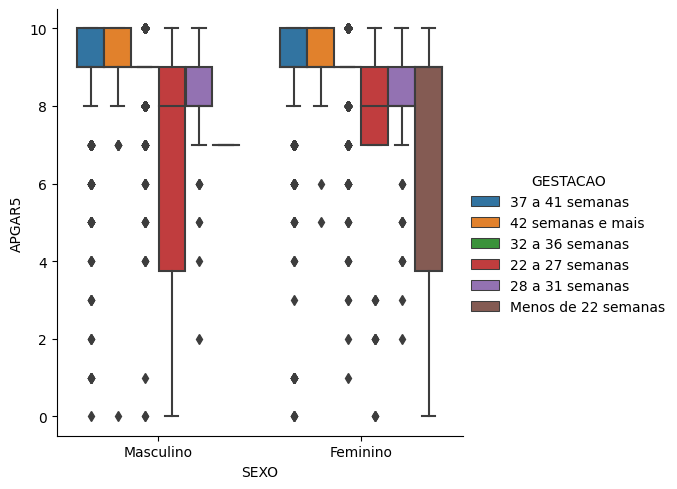

In [4]:
sns.catplot(x='SEXO', y='APGAR5', hue='GESTACAO', kind='box', data=sinasc)

**Explicação para esclarecimento do código acima**

**x:** o nome da variável categórica que vai no eixo x do gráfico. No nosso caso, é o sexo do nascido vivo (‘SEXO’). Como temos dois sexos, então ele separa em Masculino e Feminino

**y:** o nome da variável numérica que vai no eixo y do gráfico. No nosso caso, é o APGAR5, que mede a vitalidade do recém-nascido.

**hue:** o nome da variável categórica que vai definir as cores dos gráficos. No nosso caso, é o tempo de gestação (‘GESTACAO’), que tem quatro categorias: 22 a 27 semanas, 28 a 31 semanas, 32 a 36 semanas e 37 a 41 semanas.

**kind:** o tipo de gráfico categórico que queremos criar. Pode ser ‘strip’, ‘swarm’, ‘box’, ‘violin’, ‘boxen’, ‘point’, ‘bar’ ou ‘count’. No nosso caso, escolhemos ‘box’, que cria um gráfico de caixa.

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
pd.crosstab(index=sinasc['GESTACAO'], columns=sinasc['APGAR5'])

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


**Explicação para esclarecimento do código acima**

**index:** o nome da variável que vai nas linhas da tabela. No nosso caso, é o tempo de gestação (‘GESTACAO’).

**columns:** o nome da variável que vai nas colunas da tabela. No nosso caso, é o APGAR5.

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
pd.crosstab(index=sinasc['GESTACAO'], columns=sinasc['APGAR5'], normalize='index')

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

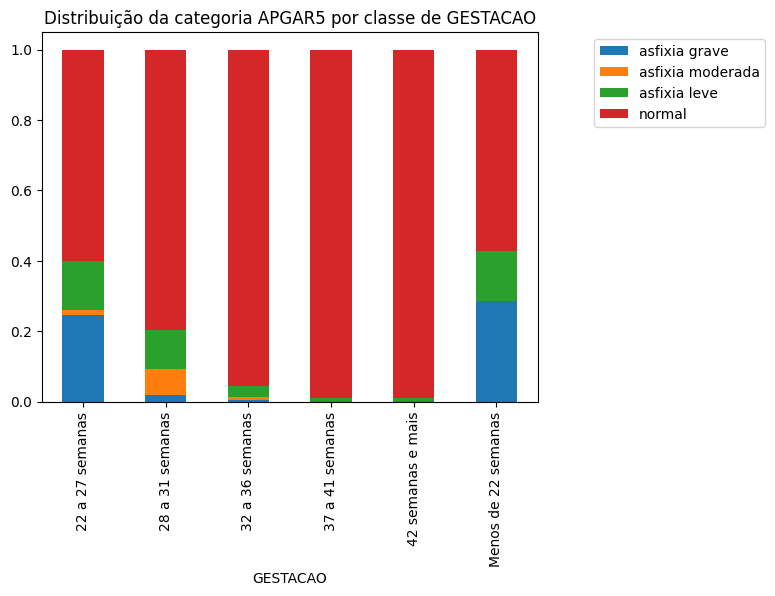

In [7]:
# a função crosstab do pandas, que calcula a frequência de cada combinação de valores das variáveis GESTACAO e categoria_apgar5.
# normalize='index' faz com que as frequências sejam calculadas como proporções dentro de cada classe de GESTACAO.

ct = pd.crosstab(index=sinasc['GESTACAO'], columns=sinasc['categoria_apgar5'], normalize='index')


# Criar o gráfico de barras com o método plot e o parâmetro kind='bar'
# kind = 'bar' é só para dizer que o gráfico é de barras
# stacked=True faz com que as barras sejam empilhadas, ou seja, que cada barra represente a soma das proporções das categorias de APGAR5 para cada classe de GESTACAO.

ct.plot(kind='bar', stacked=True)


# Adicionar um título ao gráfico (autoexplicativo)
plt.title('Distribuição da categoria APGAR5 por classe de GESTACAO')


# Separar a legenda do gráfico por uma distância de 0.1 com o parâmetro bbox_to_anchor
# Fiz isso porque a legenda estava em cima do g´rafico dificultando a visualização dele

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')


plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

**Usando um gráfico de dispersão**

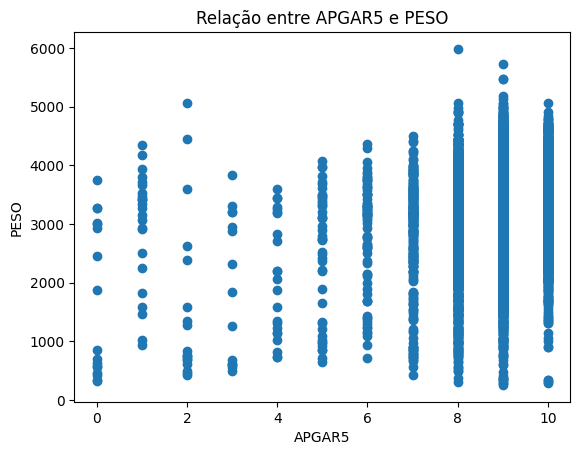

In [8]:
# Criar o gráfico de dispersão com a função scatter do matplotlib

plt.scatter(x=sinasc['APGAR5'], y=sinasc['PESO'])


# Adicionar um título ao gráfico
plt.title('Relação entre APGAR5 e PESO')

# Adicionar rótulos aos eixos
plt.xlabel('APGAR5')
plt.ylabel('PESO')

plt.show()

**Usando um grafico de linha**

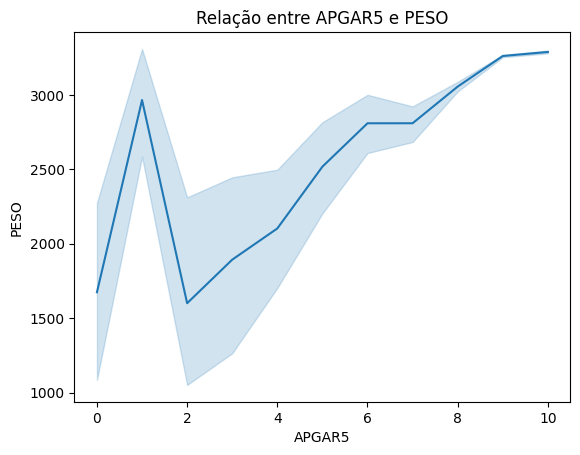

In [13]:
sns.lineplot(data=sinasc, x="APGAR5", y="PESO")

# Adicionar um título ao gráfico
plt.title('Relação entre APGAR5 e PESO')

# Adicionar rótulos aos eixos
plt.xlabel('APGAR5')
plt.ylabel('PESO')


plt.show()

**Usando um grafico de caixa**

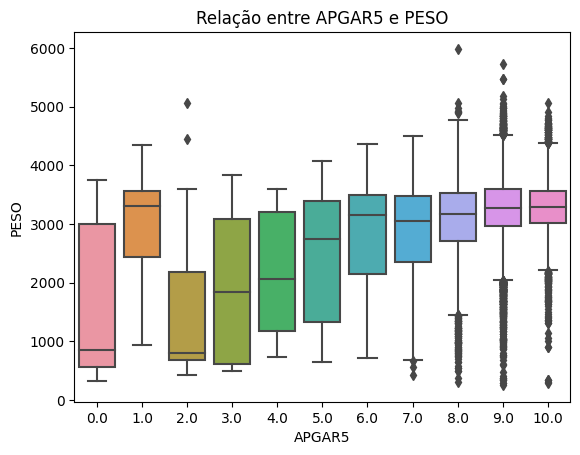

In [14]:
sns.boxplot(data=sinasc, x="APGAR5", y="PESO")

# Adicionar um título ao gráfico
plt.title('Relação entre APGAR5 e PESO')

# Adicionar rótulos aos eixos
plt.xlabel('APGAR5')
plt.ylabel('PESO')


plt.show()

**Usando um grafico de violino**

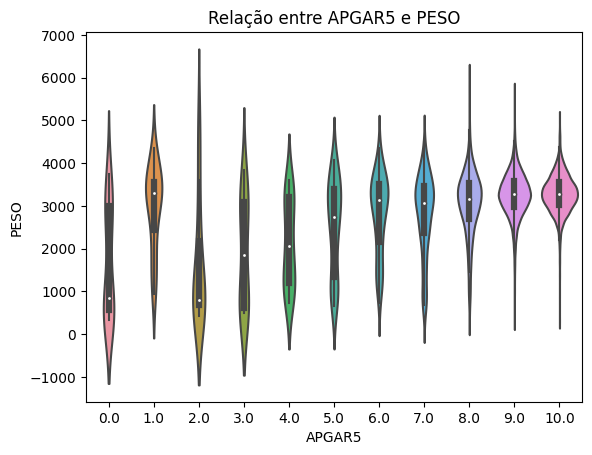

In [15]:
sns.violinplot(data=sinasc, x="APGAR5", y="PESO")

# Adicionar um título ao gráfico
plt.title('Relação entre APGAR5 e PESO')

# Adicionar rótulos aos eixos
plt.xlabel('APGAR5')
plt.ylabel('PESO')


plt.show()